In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 13
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
# 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df, n):
    print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
    summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
    summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

    summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
    summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산
    
    for i in range(n):
        summary[f"{i+1}번째 값"] = df.iloc[i].values
    
    return summary                                                     # 요약 테이블 반환

In [3]:
df1 = pd.read_csv('EDA/unique제거/train_2_신용정보_unique1제거_40.csv')

In [4]:
with pd.option_context('display.max_rows', None):
    display(resumetable(df1, 5))

데이터셋 크기: (2400000, 40)


,피처,데이터 타입,결측값 개수,고유값 개수,1번째 값,2번째 값,3번째 값,4번째 값,5번째 값
0,기준년월,int64,0,6,201807,201807,201807,201807,201807
1,ID,object,0,400000,TRAIN_000000,TRAIN_000001,TRAIN_000002,TRAIN_000003,TRAIN_000004
2,최초한도금액,int64,0,8802,0,0,0,0,0
3,카드이용한도금액,int64,0,81852,19354,9996,88193,19062,177222
4,CA한도금액,int64,0,63634,7270,5718,35207,6531,47149
5,일시상환론한도금액,int64,0,7307,0,41996,0,0,48000
6,월상환론한도금액,int64,0,65045,0,90611,0,0,155020
7,CA이자율_할인전,float64,0,1882014,22.995207,14.793821,22.014276,22.998014,14.661948
8,CL이자율_할인전,float64,0,2126771,18.254978,14.834873,17.875321,22.999453,10.89741
9,RV일시불이자율_할인전,float64,0,1897473,17.264967,10.622446,17.155829,19.293674,10.654587


In [8]:
def plot_hist_kde_per_column(df):
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        plt.figure()
        sns.histplot(df[col], bins=50, kde=True, edgecolor='black')
        plt.title(f"[{col}] 히스토그램 + KDE")
        plt.xlabel(col)
        plt.ylabel("빈도수")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

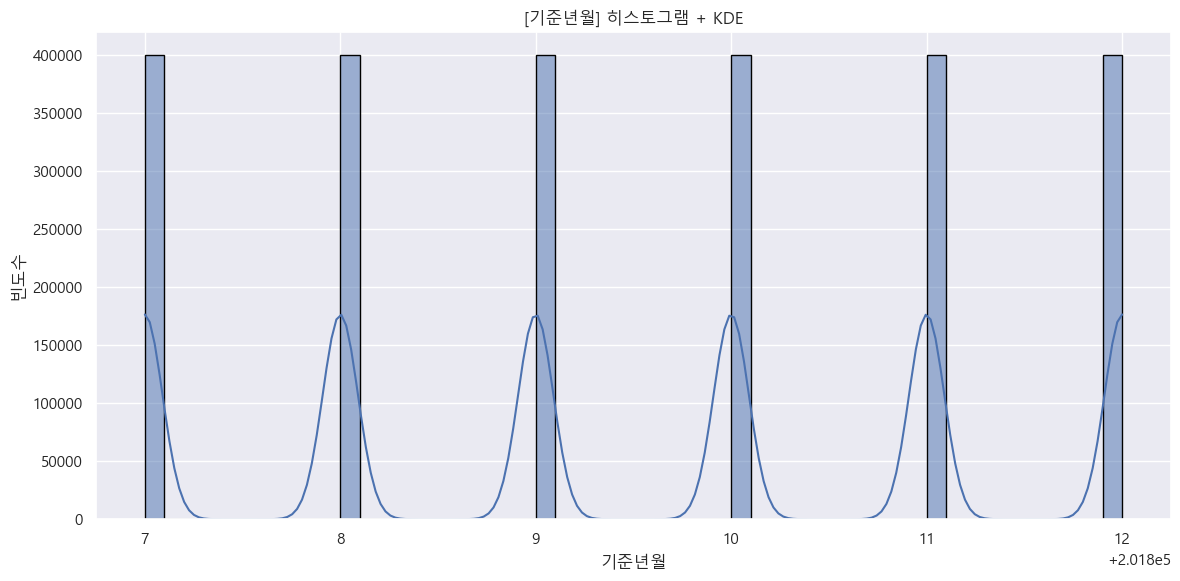

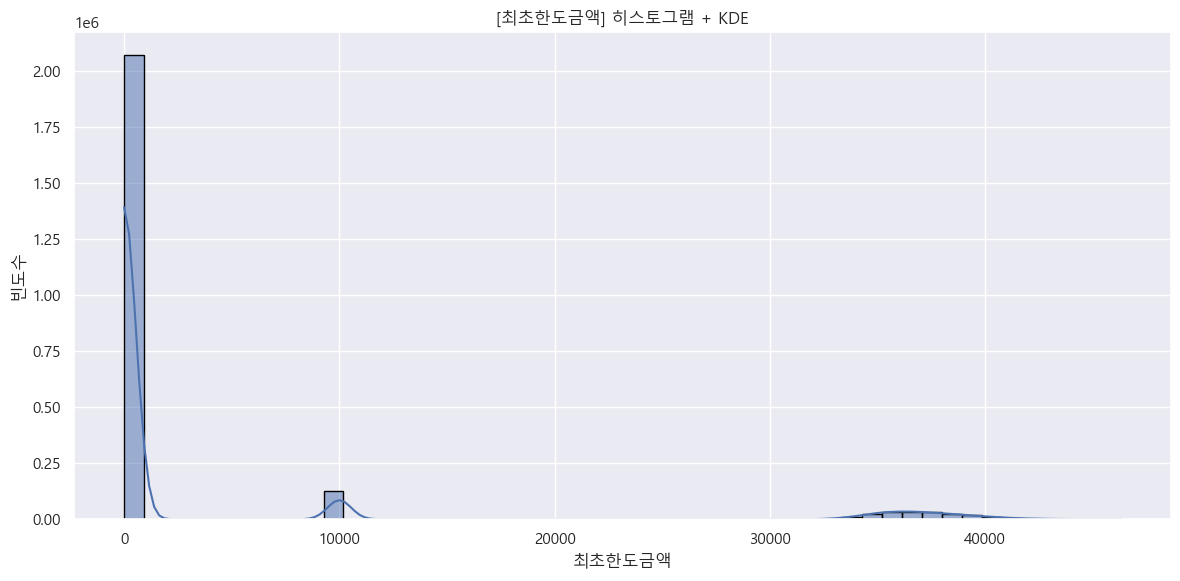

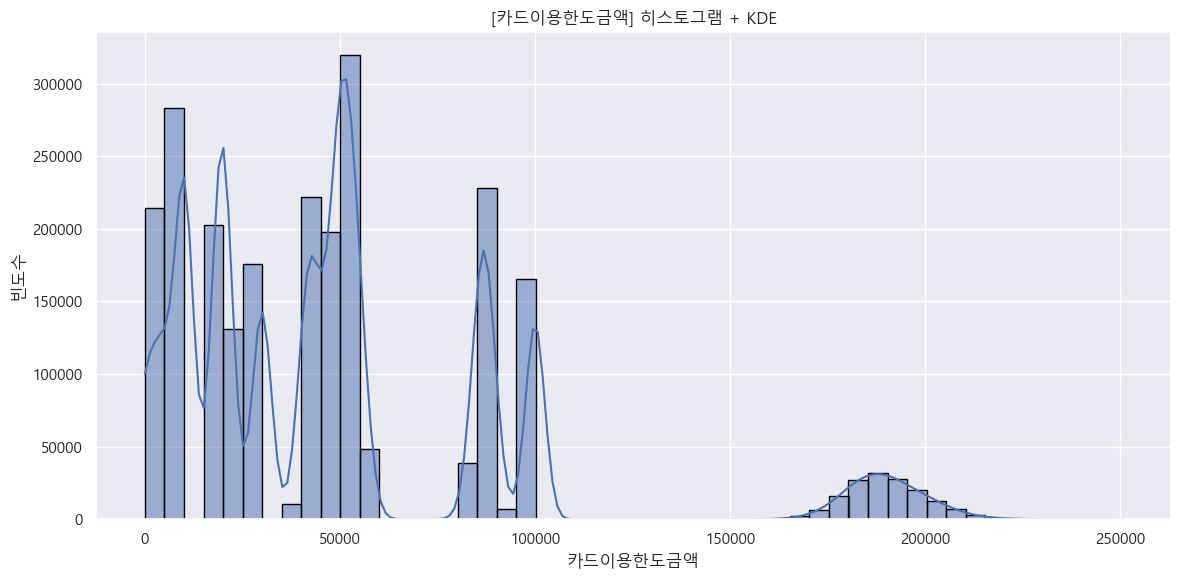

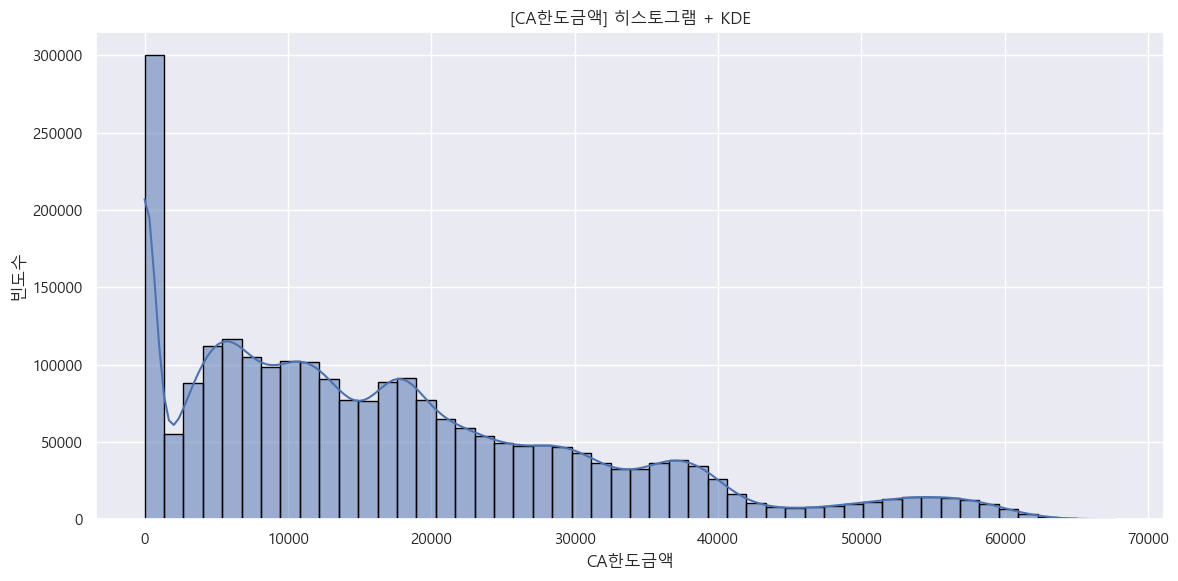

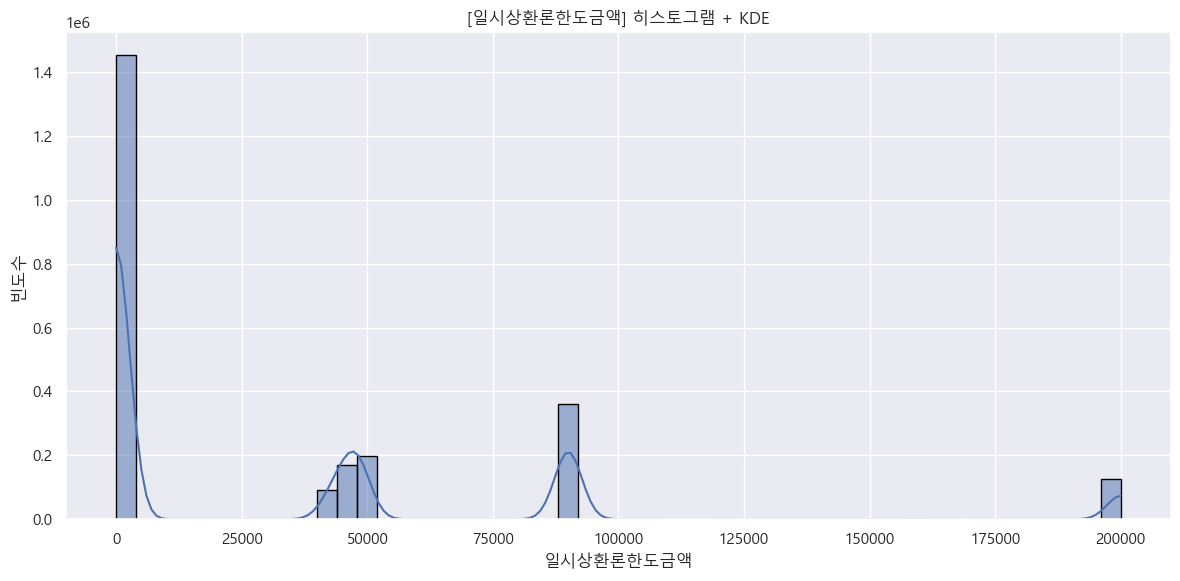

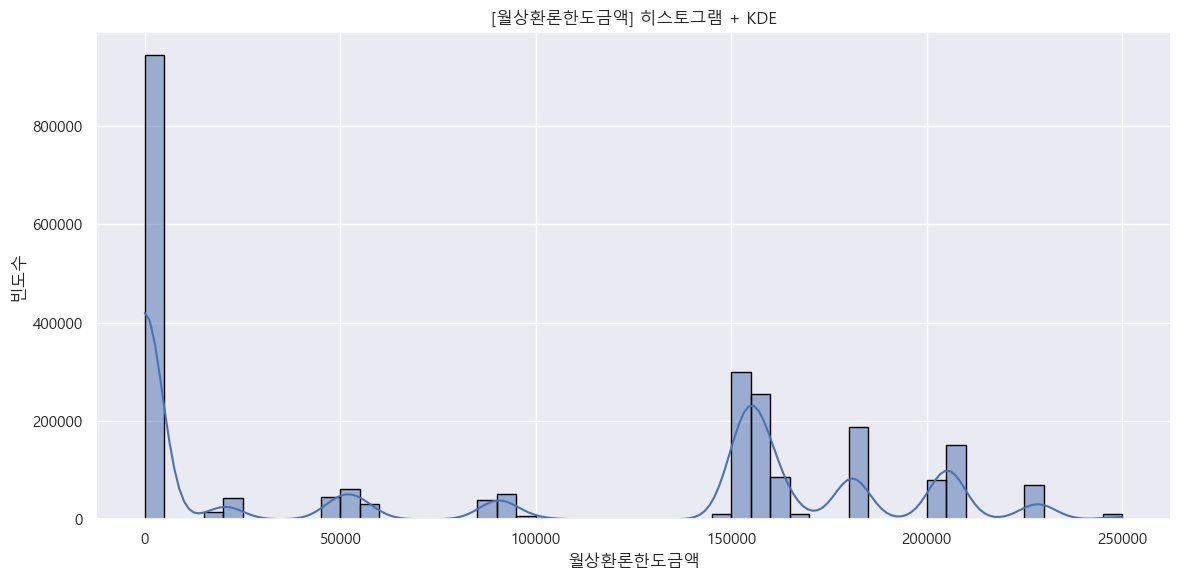

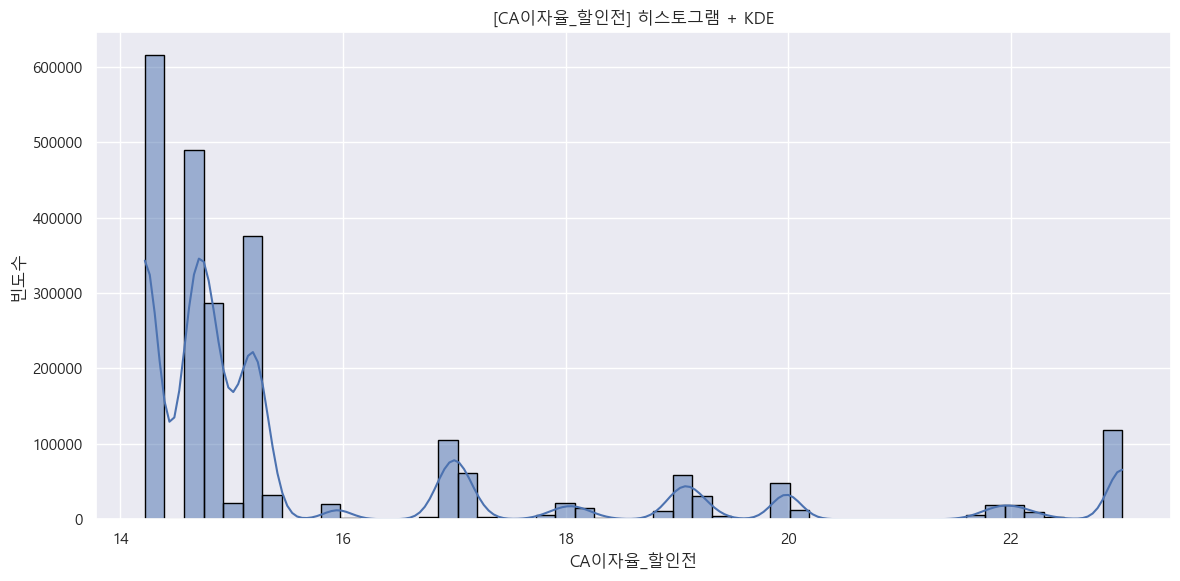

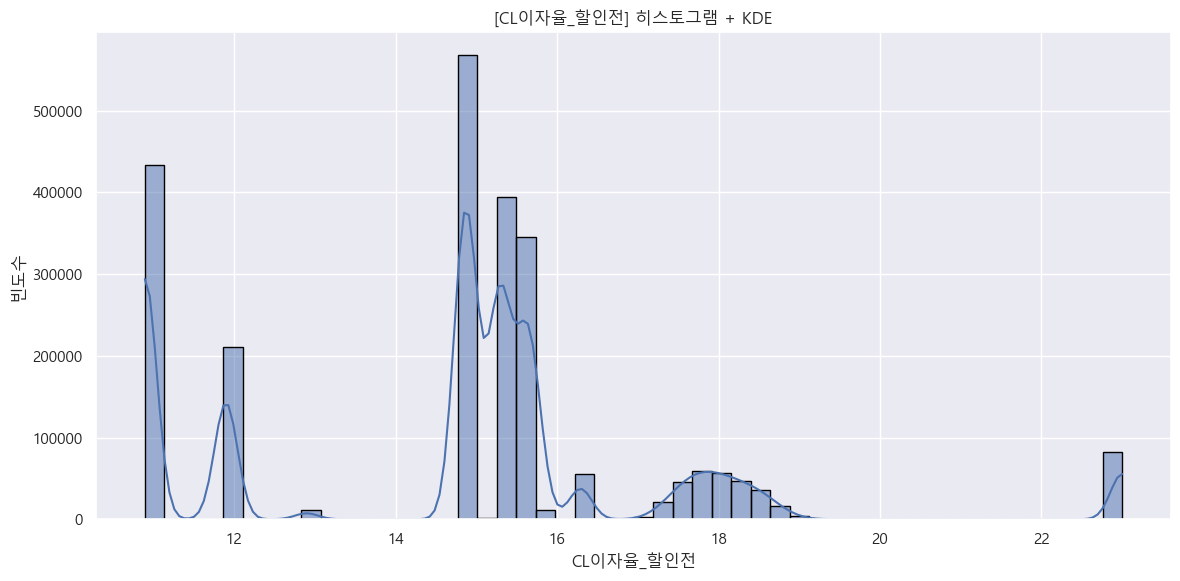

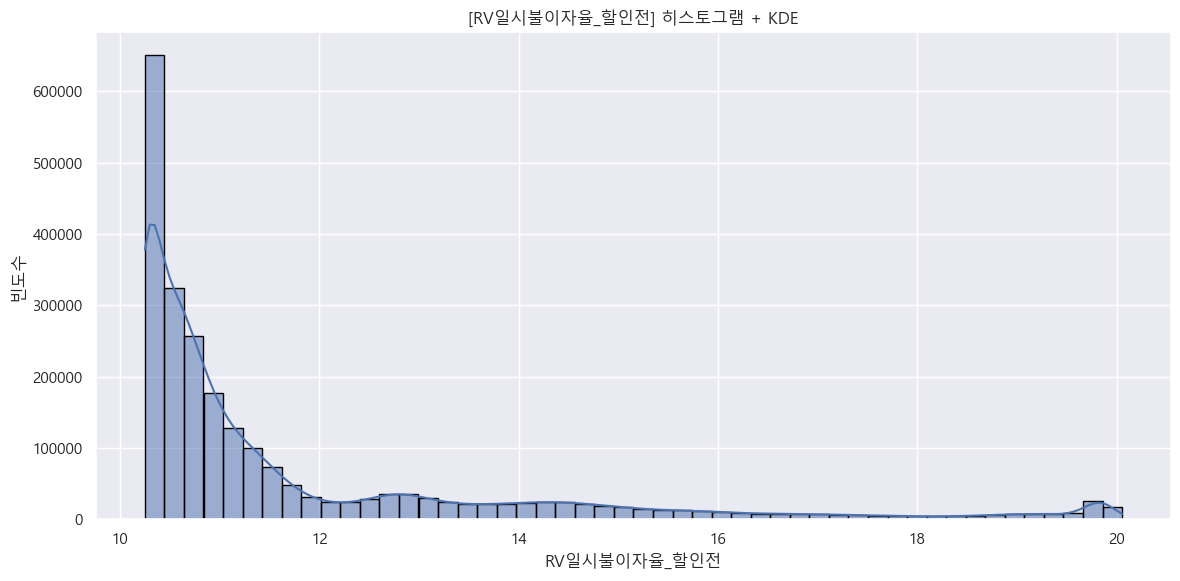

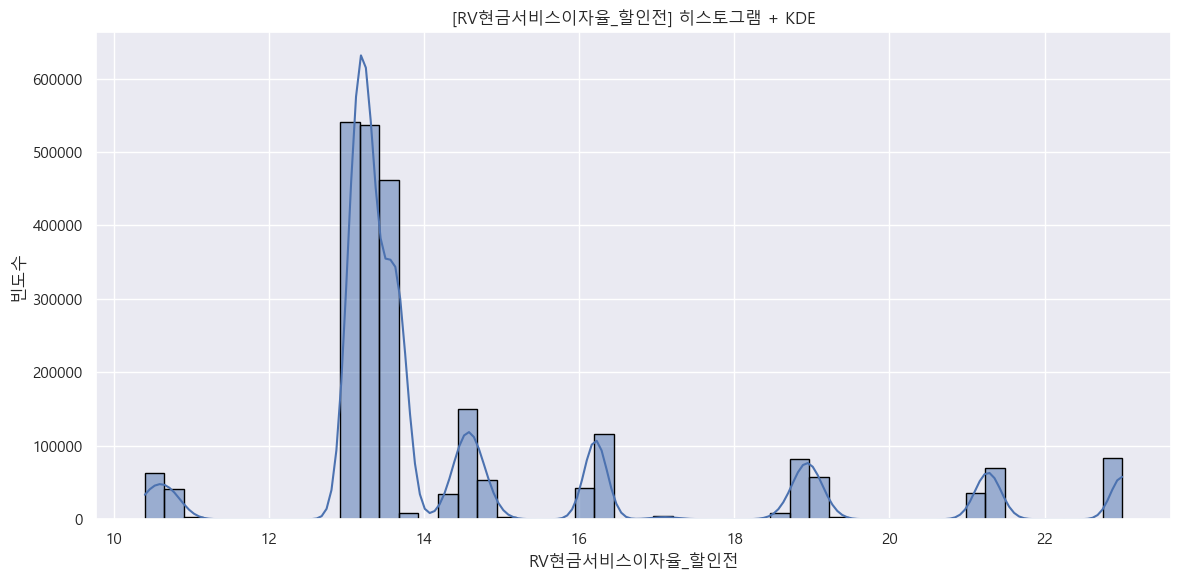

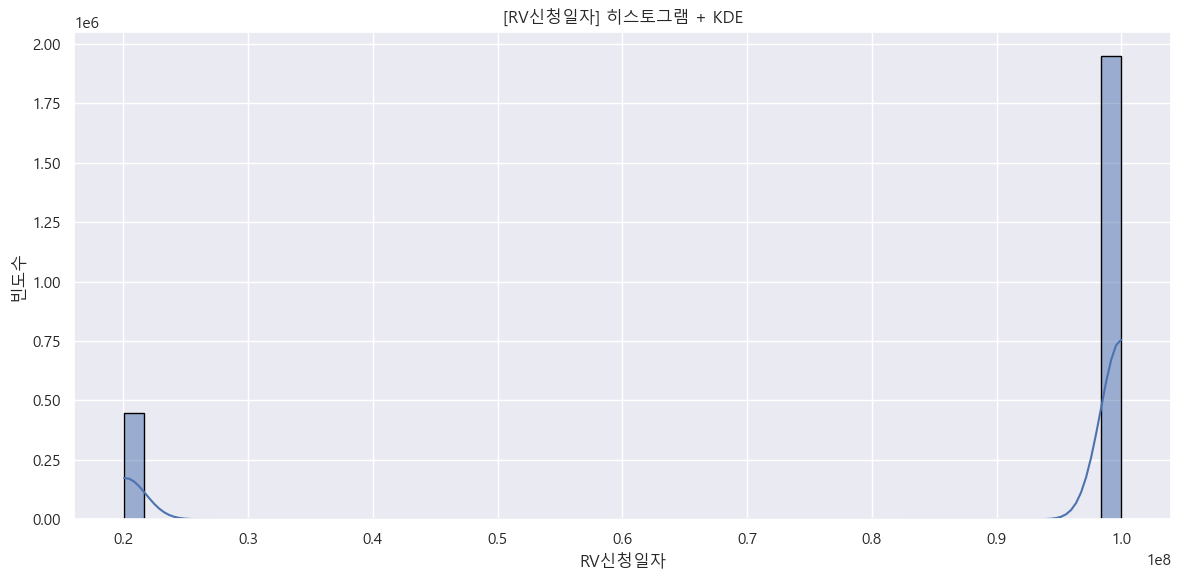

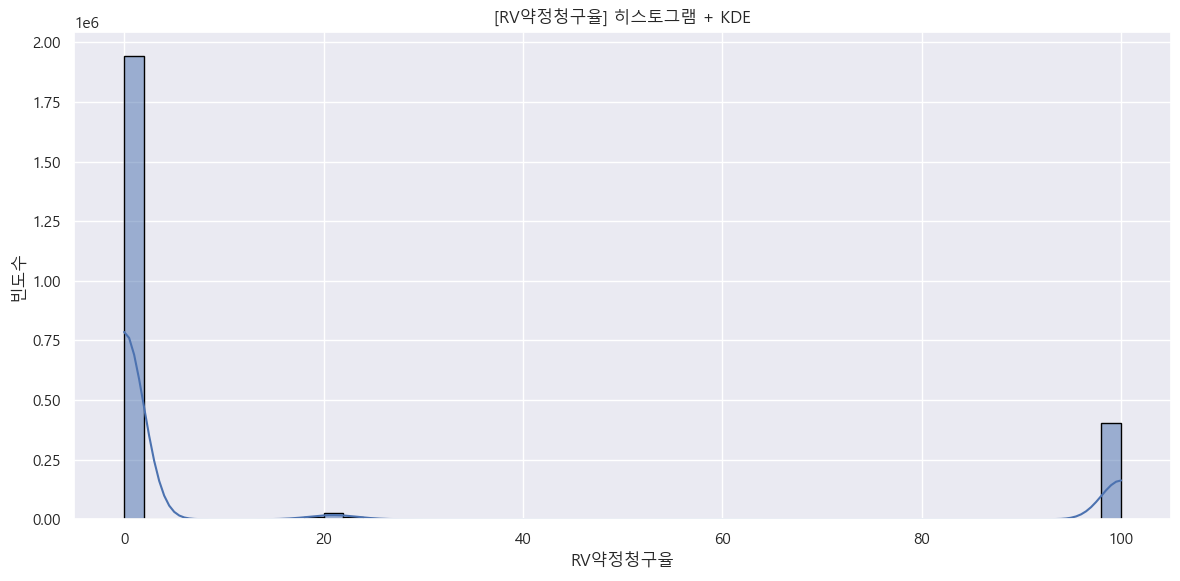

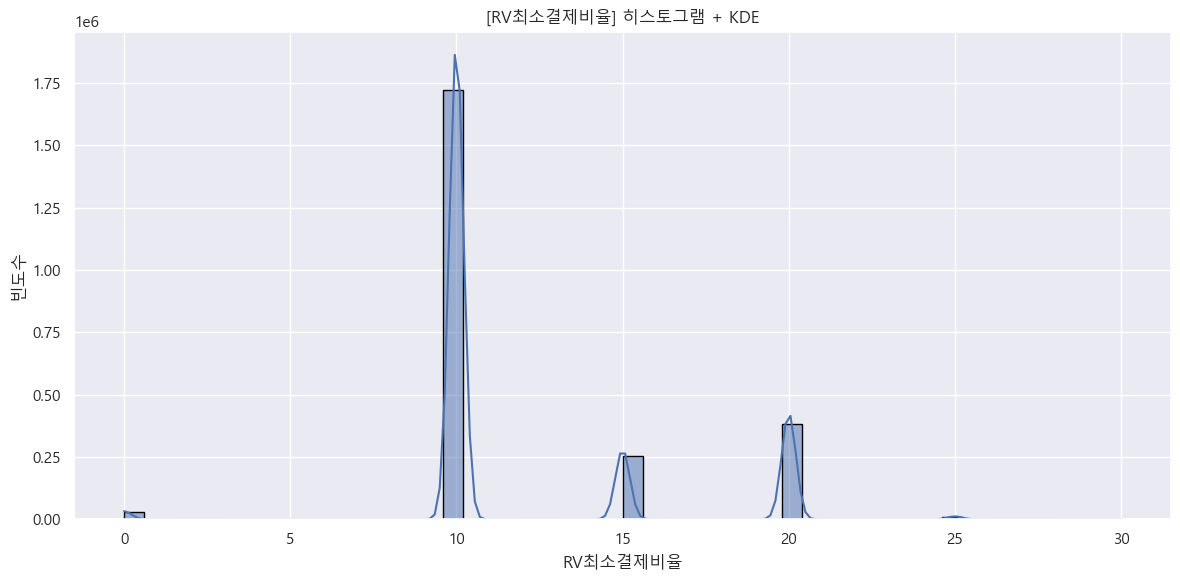

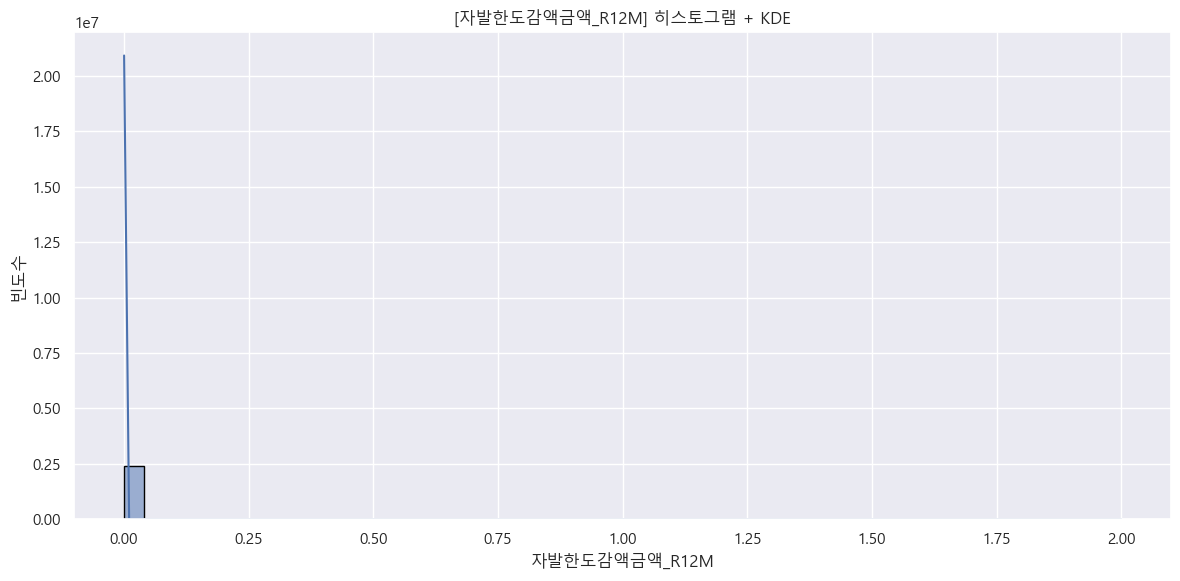

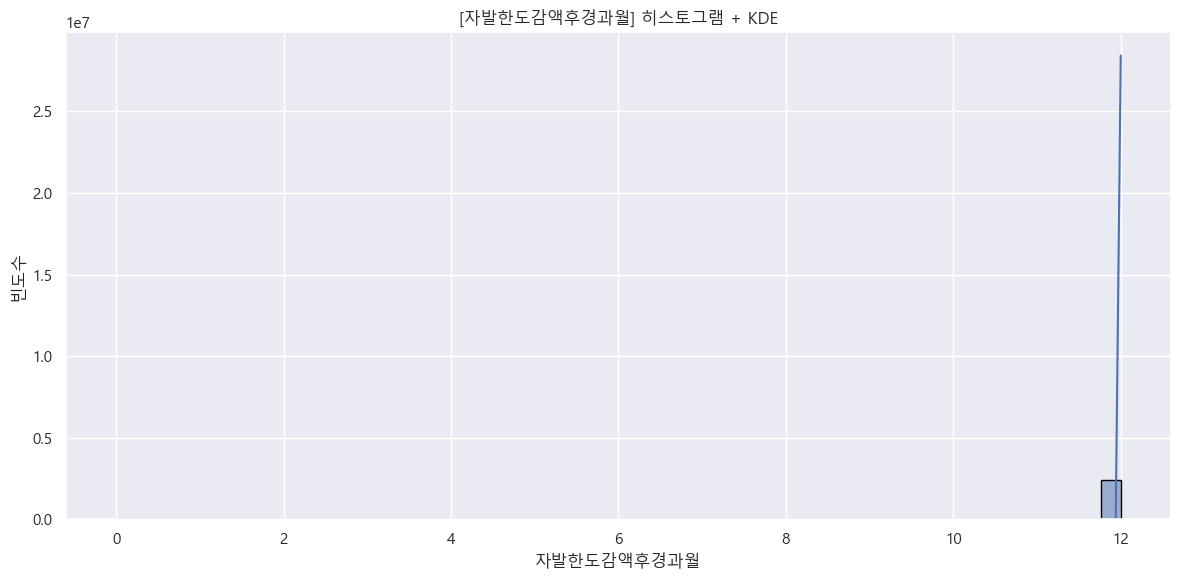

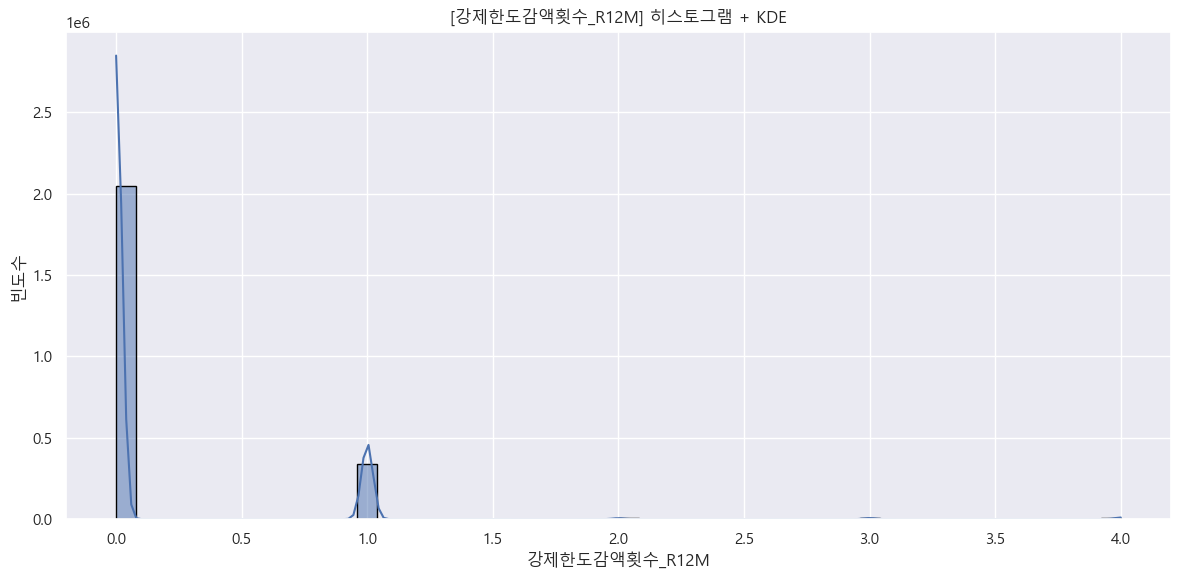

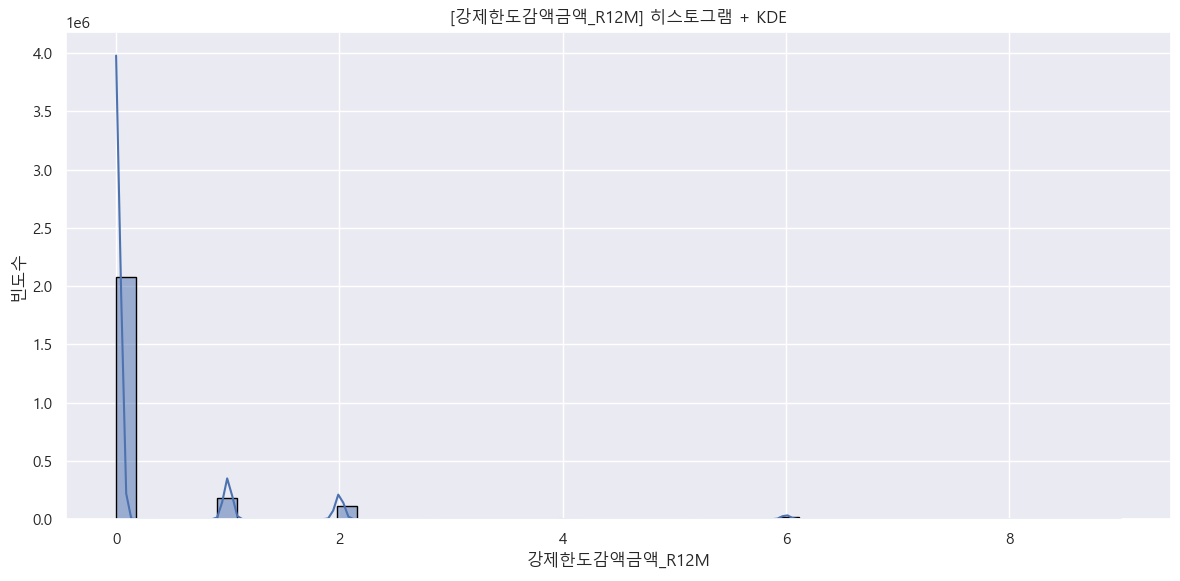

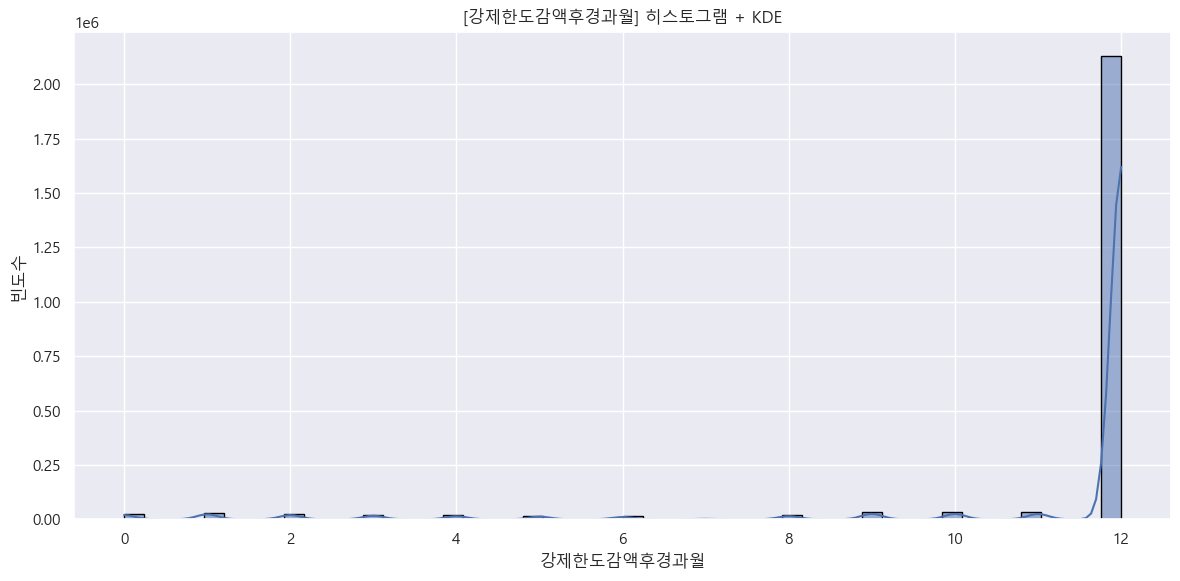

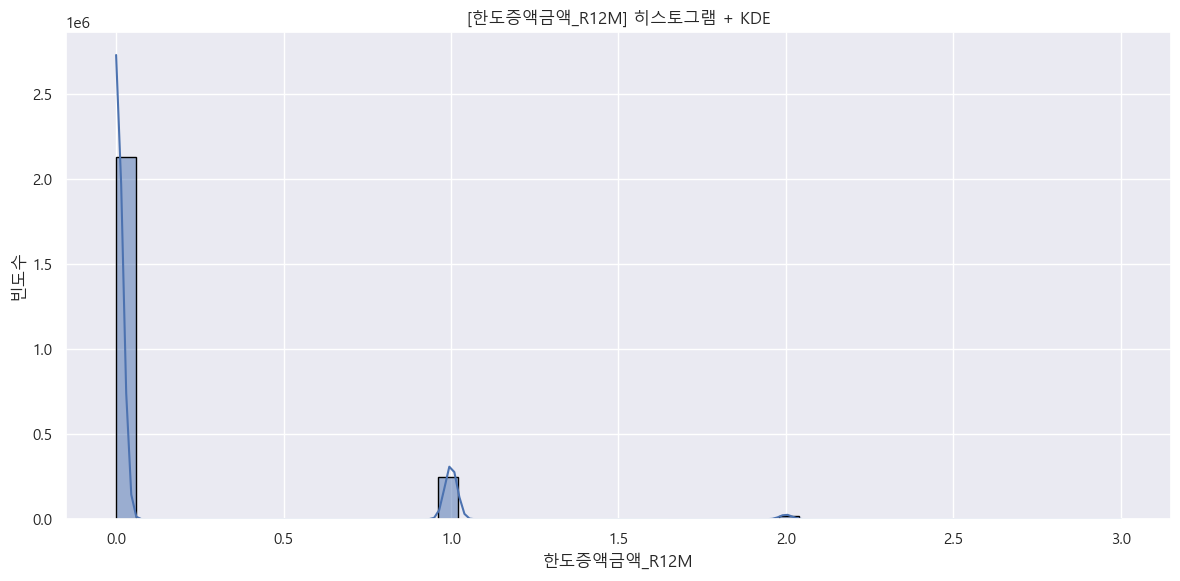

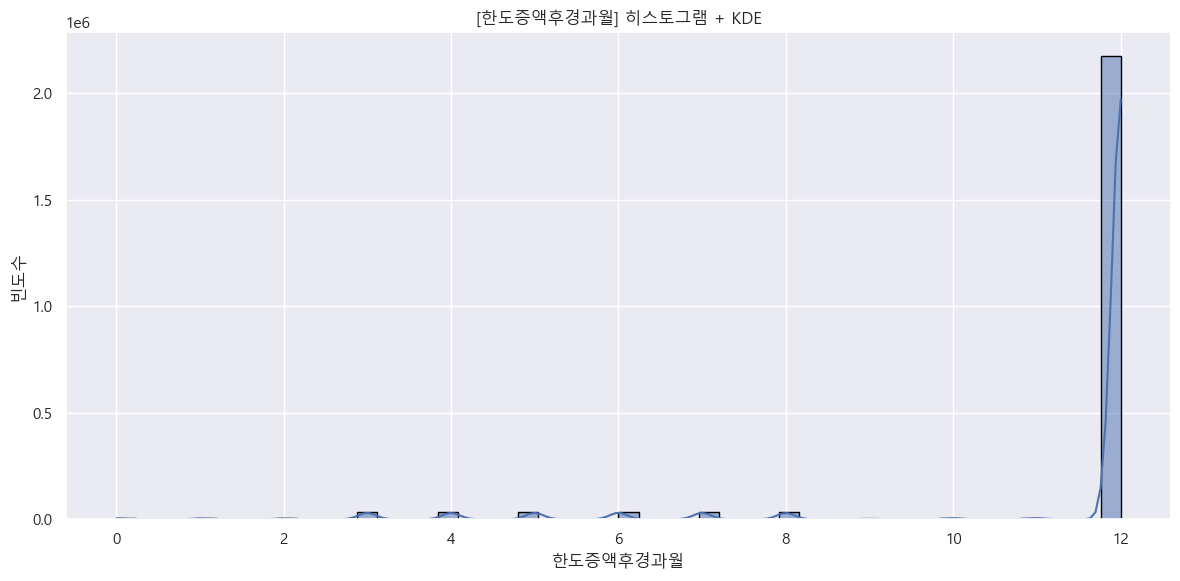

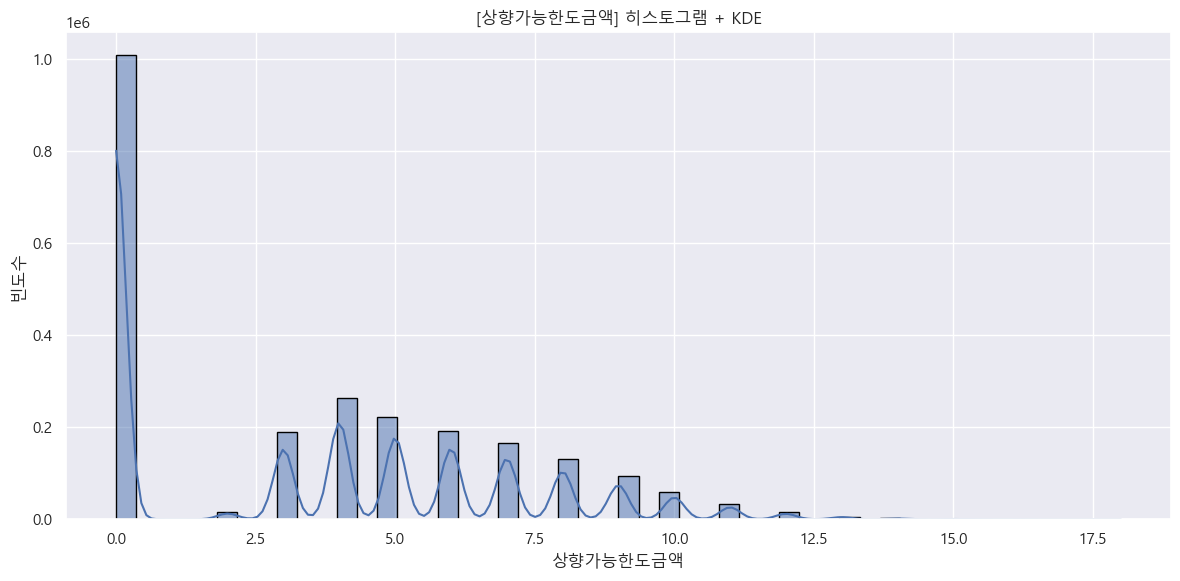

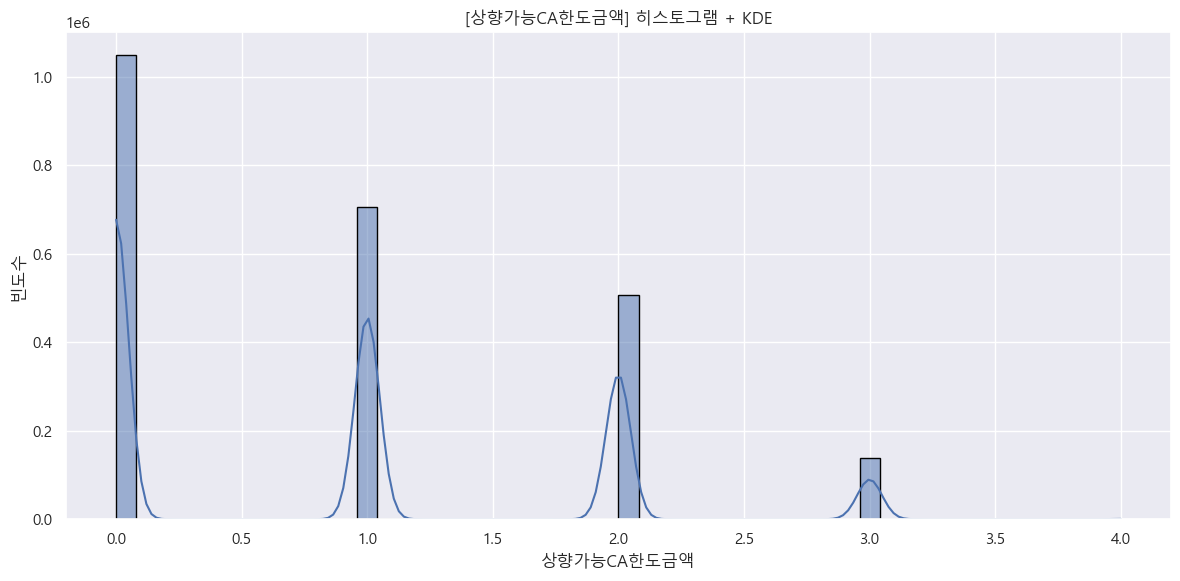

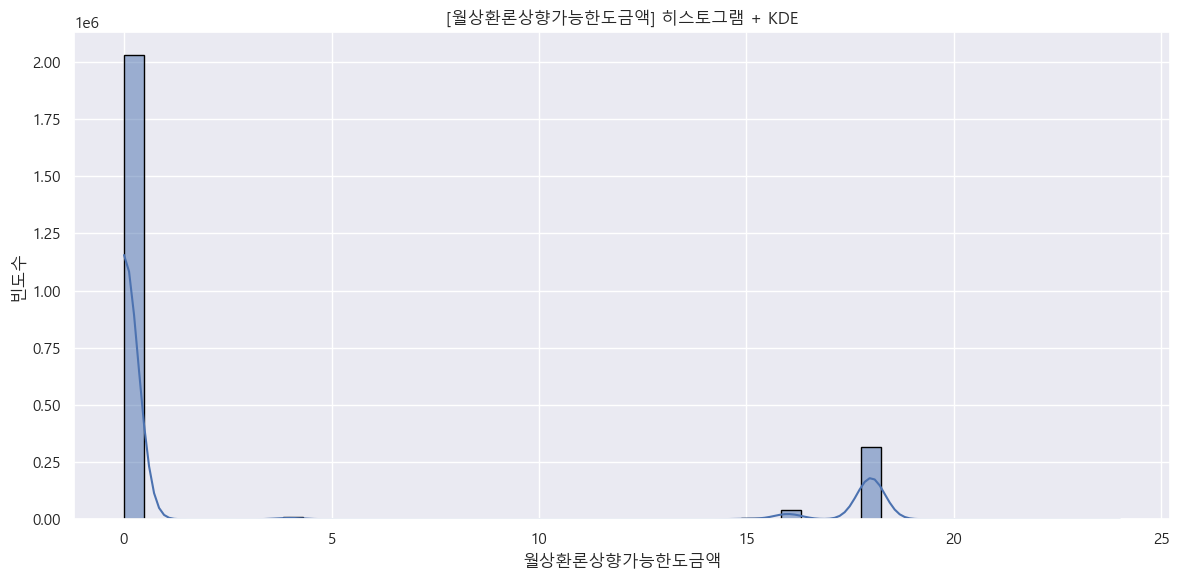

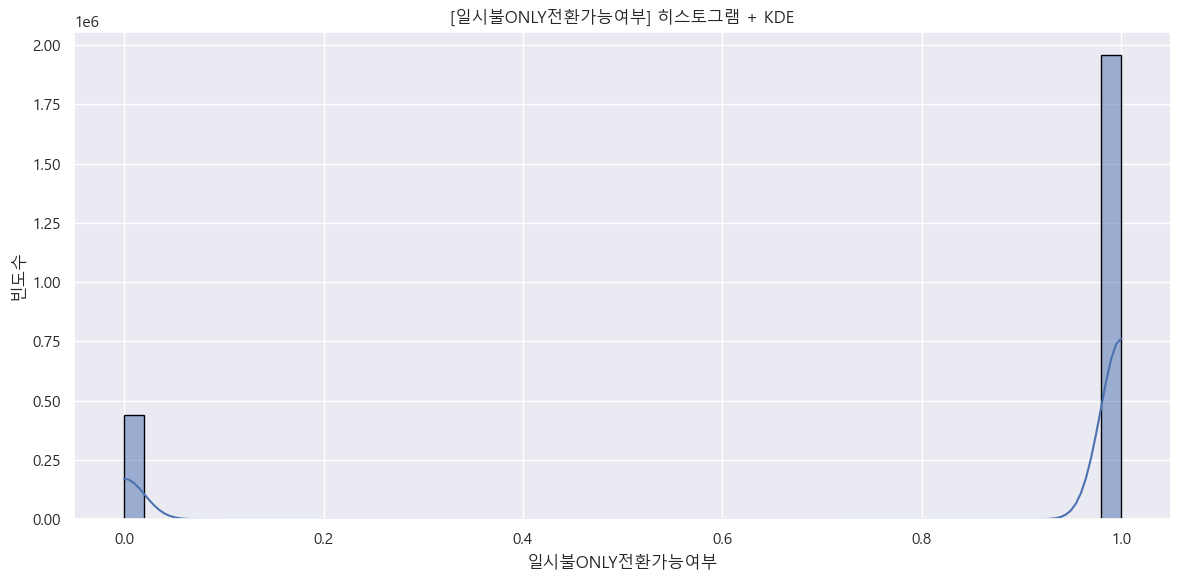

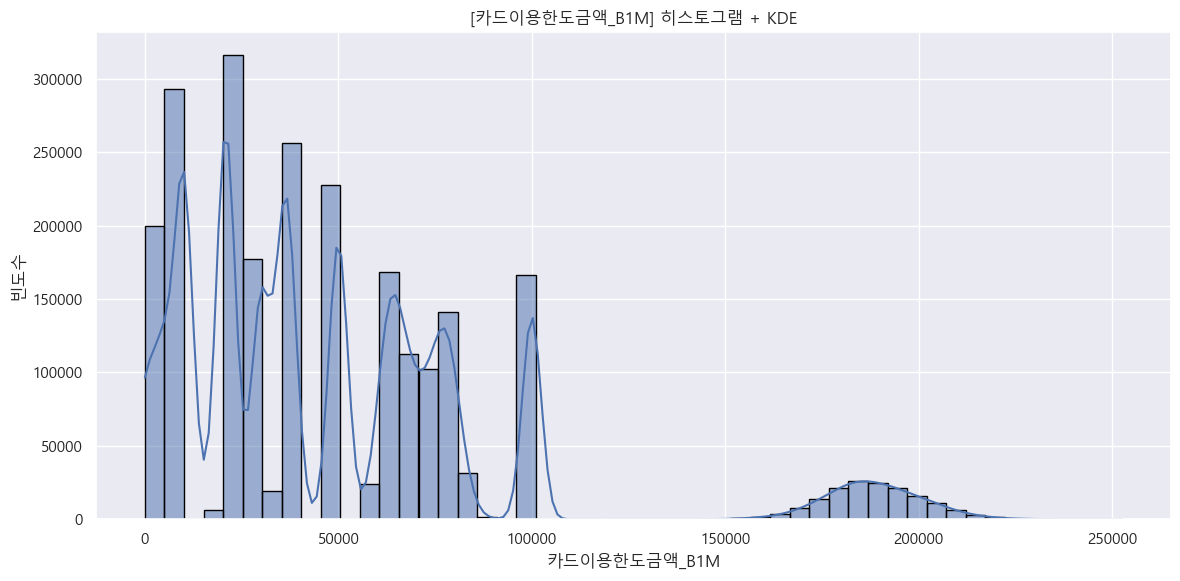

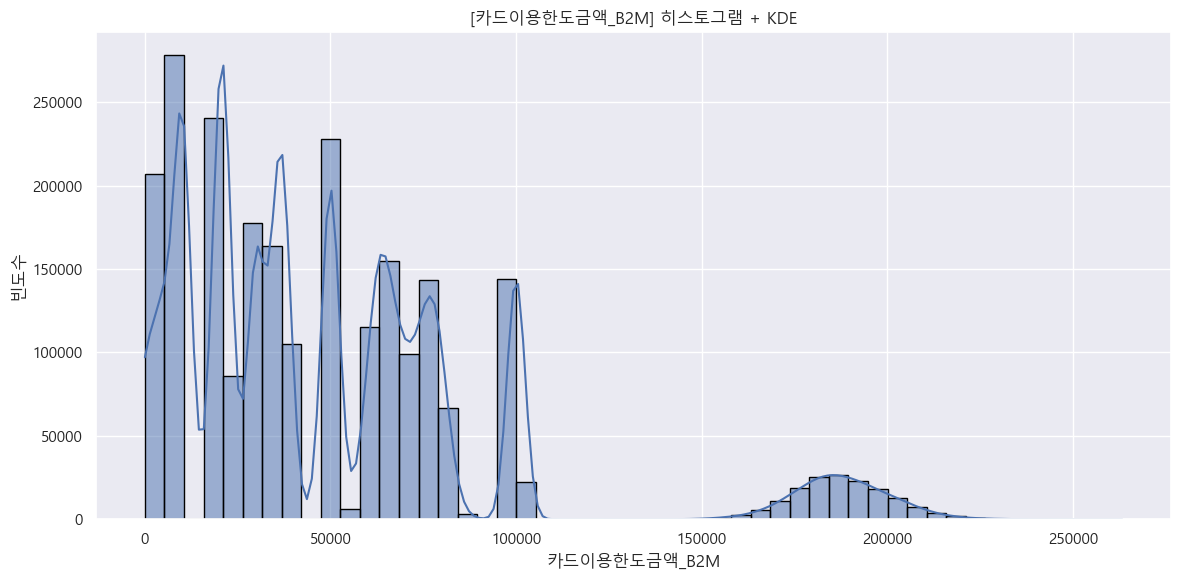

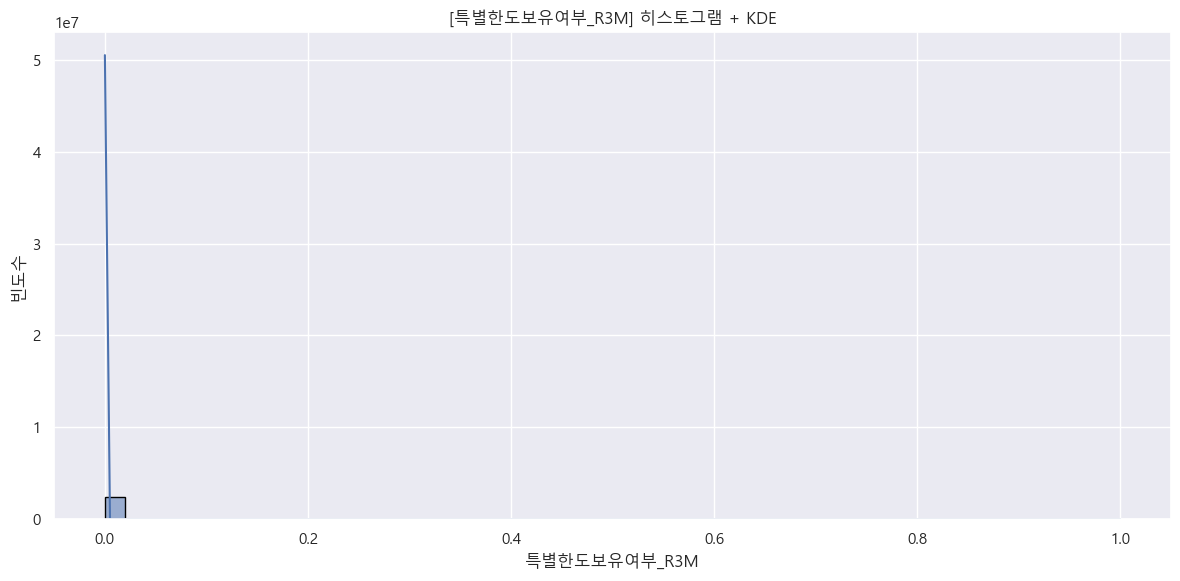

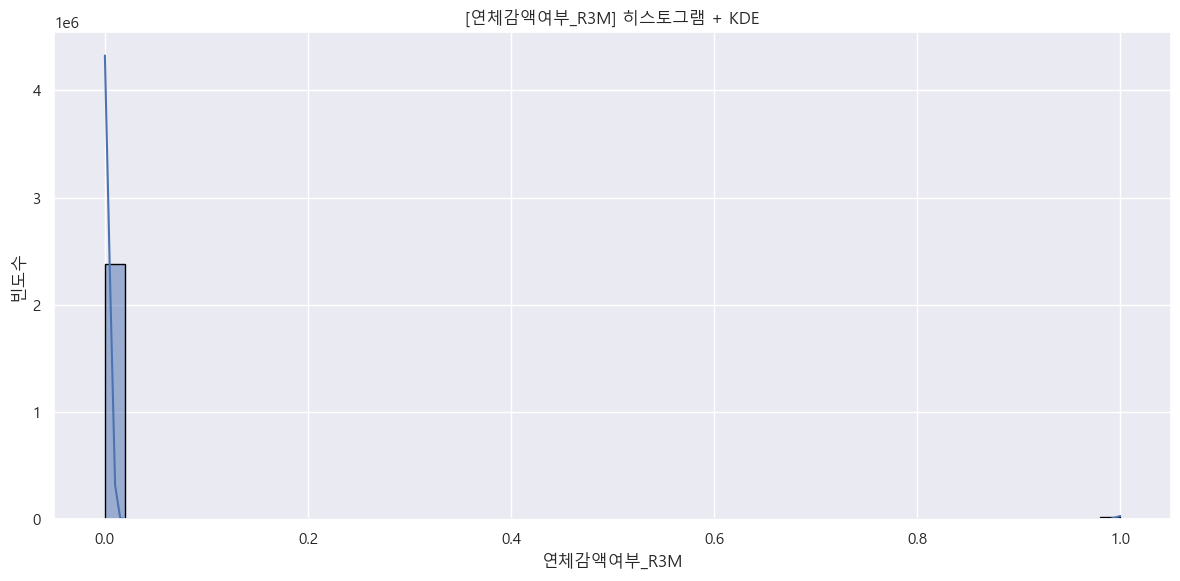

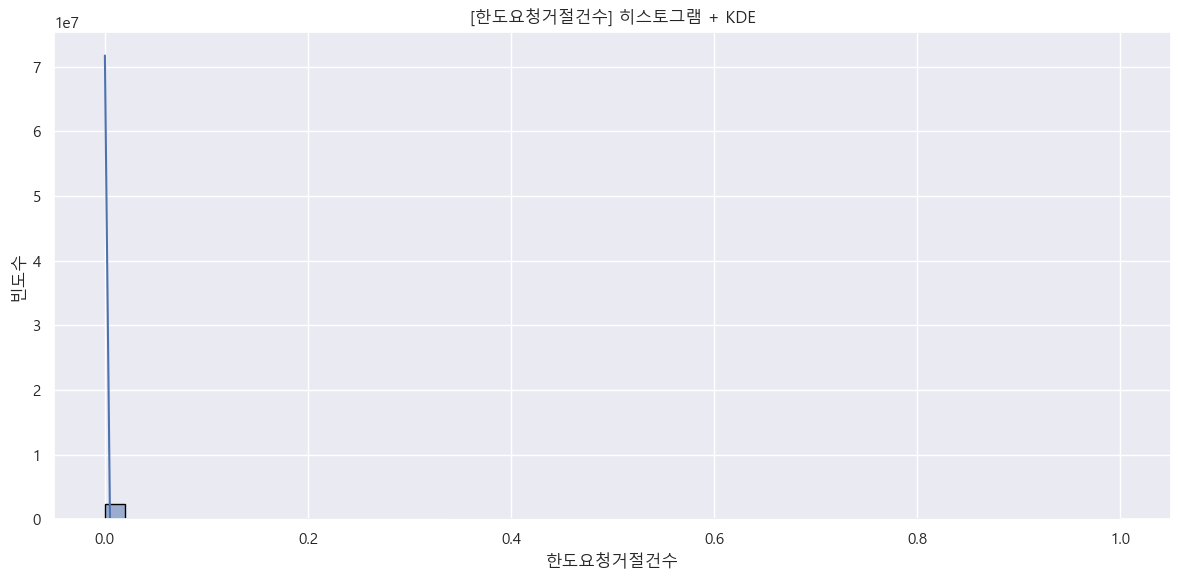

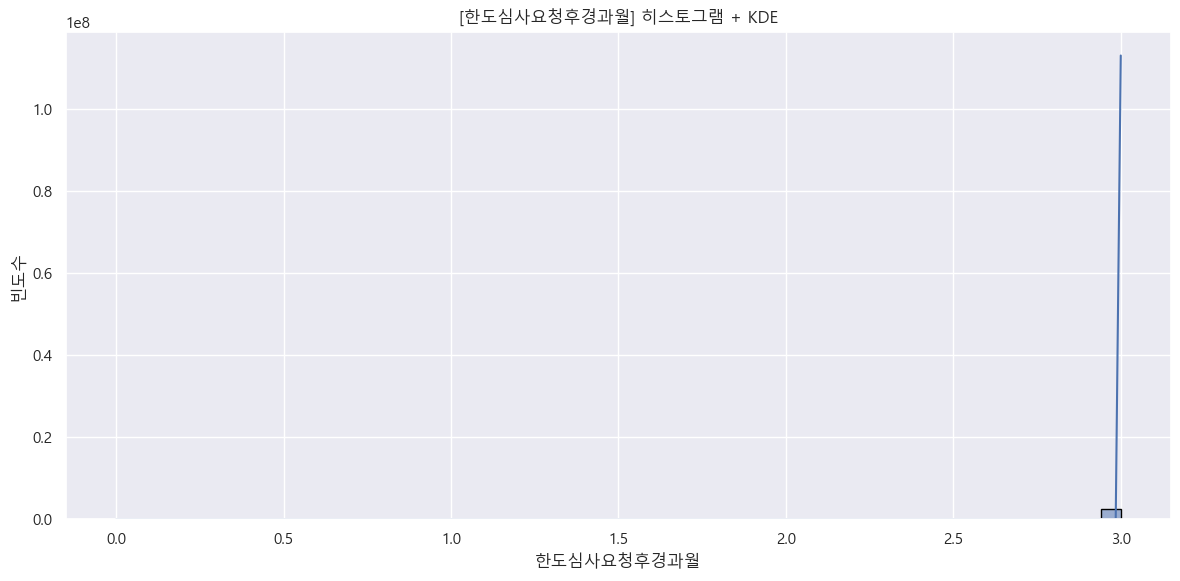

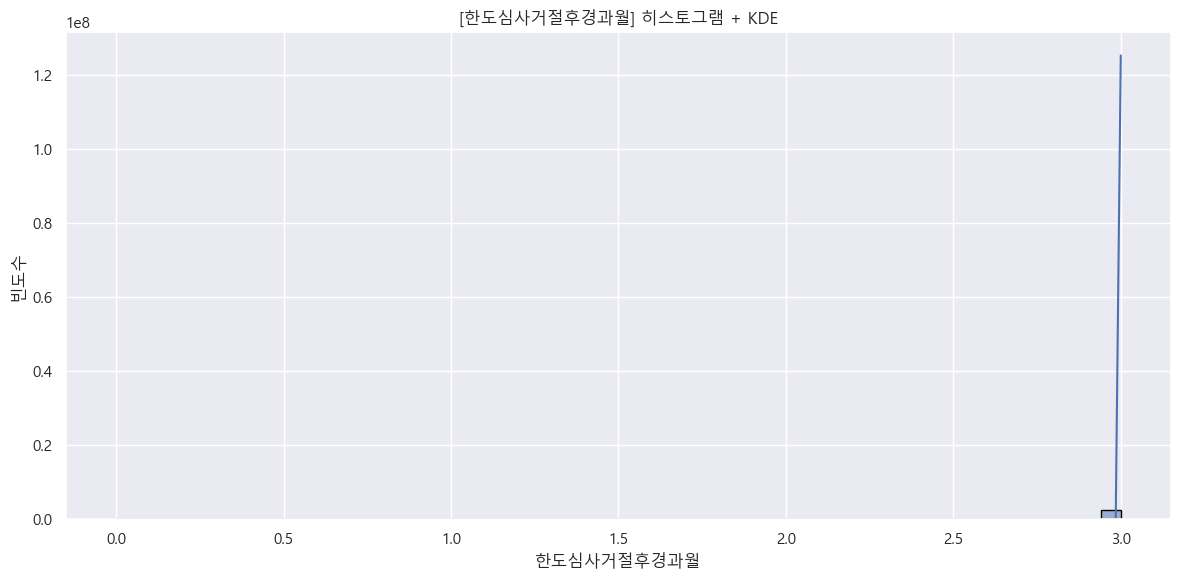

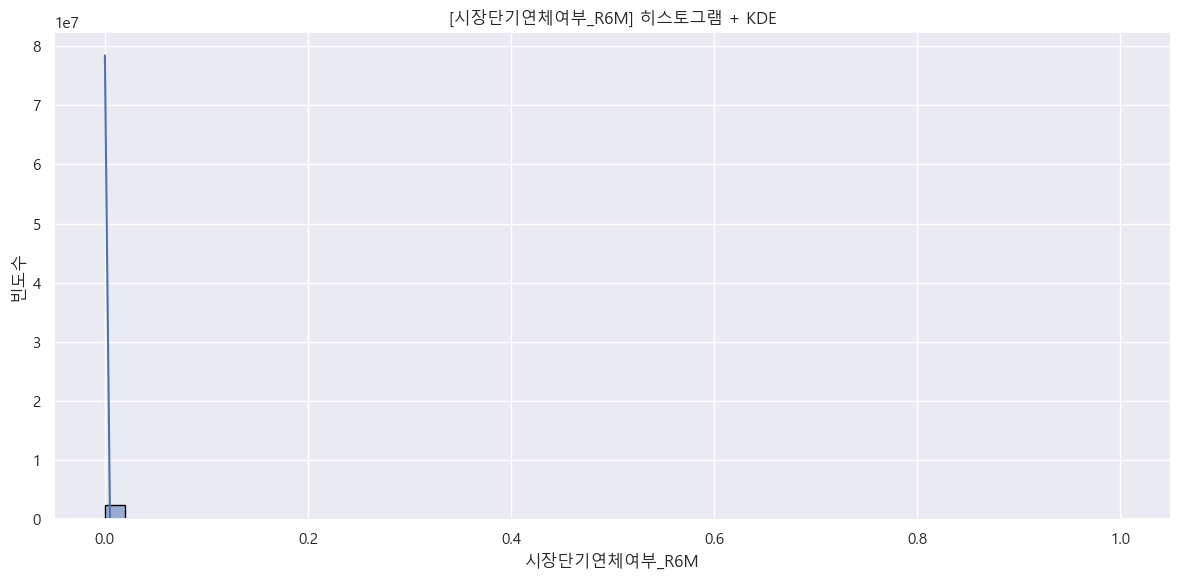

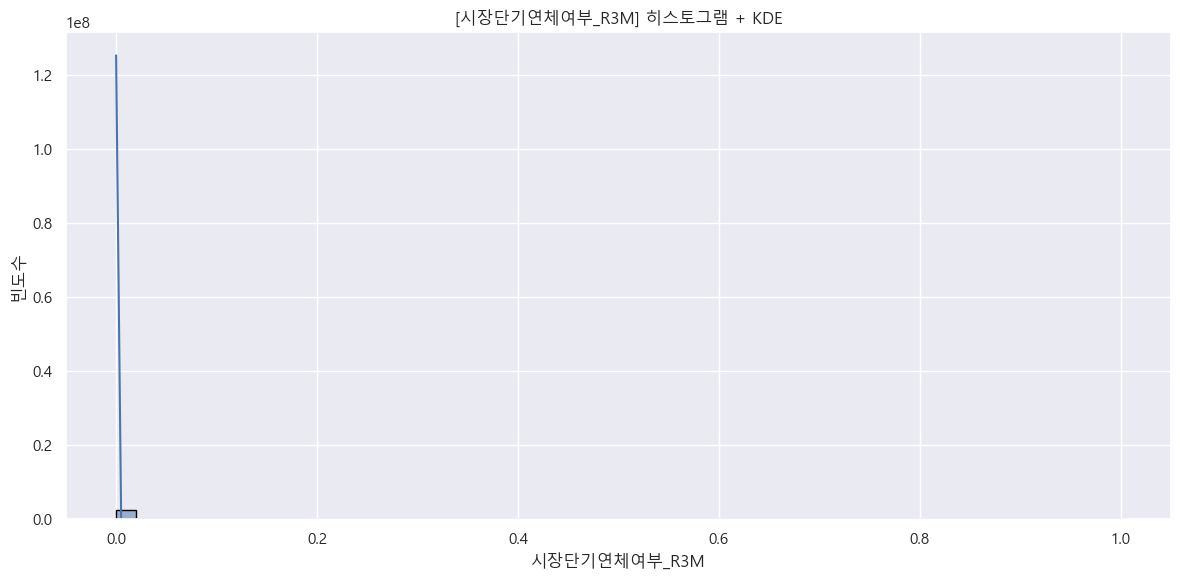

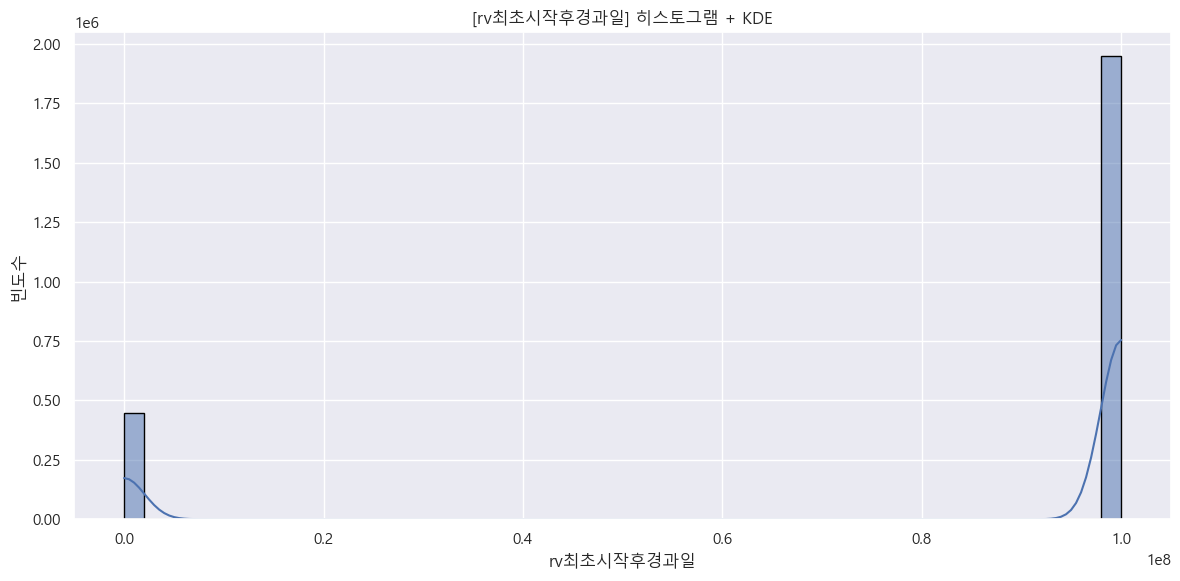

In [9]:
plot_hist_kde_per_column(df1)


### RV신청일자

In [17]:
df1['RV신청일자'].value_counts(normalize=True)

RV신청일자
99991231    8.130150e-01
20160819    4.337500e-04
20160813    4.266667e-04
20160718    4.191667e-04
20160823    4.116667e-04
                ...     
20060702    4.166667e-07
20180823    4.166667e-07
20060318    4.166667e-07
20050630    4.166667e-07
20061003    4.166667e-07
Name: proportion, Length: 2045, dtype: float64

In [13]:
df1['자발한도감액횟수_R12M'].value_counts()

자발한도감액횟수_R12M
0회    2397778
1회       2216
2회          6
Name: count, dtype: int64

In [15]:
# pandas 옵션 설정: 출력 시 모든 컬럼이 보이도록
pd.set_option('display.max_columns', None)

# 조건에 맞는 행 필터링
df_9999 = df1[df1['RV신청일자'] == 99991231]

# 결과 출력
df_9999

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,RV현금서비스이자율_할인전,RV신청일자,RV약정청구율,RV최소결제비율,자발한도감액횟수_R12M,자발한도감액금액_R12M,자발한도감액후경과월,강제한도감액횟수_R12M,강제한도감액금액_R12M,강제한도감액후경과월,한도증액횟수_R12M,한도증액금액_R12M,한도증액후경과월,상향가능한도금액,상향가능CA한도금액,카드론동의여부,월상환론상향가능한도금액,RV전환가능여부,일시불ONLY전환가능여부,카드이용한도금액_B1M,카드이용한도금액_B2M,특별한도보유여부_R3M,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,rv최초시작후경과일
0,201807,TRAIN_000000,0,19354,7270,0,0,22.995207,18.254978,17.264967,21.234252,99991231,0.0,19.99996,0회,0,12,0,0,12,0회,0,12,0,0,Y,0,N,0,20805,19723,0,0,0회,0,3,3,0,0,99999999
3,201807,TRAIN_000003,0,19062,6531,0,0,22.998014,22.999453,19.293674,22.999954,99991231,0.0,19.99996,0회,0,12,0,0,12,0회,0,12,0,0,Y,0,N,0,20523,19226,0,0,0회,0,3,3,0,0,99999999
4,201807,TRAIN_000004,0,177222,47149,48000,155020,14.661948,10.897410,10.654587,10.504785,99991231,0.0,9.99998,0회,0,12,0,0,12,0회,0,12,0,0,Y,0,Z,1,169667,168681,0,0,0회,0,3,3,0,0,99999999
5,201807,TRAIN_000005,0,9998,6028,0,0,14.219972,14.877014,10.249980,13.160847,99991231,0.0,9.99998,0회,0,12,0,0,12,0회,0,12,4,1,N,18,Z,1,10000,10000,0,0,0회,0,3,3,0,0,99999999
7,201807,TRAIN_000007,0,4229,4765,43364,53496,14.220039,10.898373,10.345940,13.121732,99991231,0.0,9.99998,0회,0,12,0,0,12,0회,0,12,3,1,Y,0,Z,1,4665,4242,0,0,0회,0,3,3,0,0,99999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,20070,10167,0,54445,15.243670,11.900516,10.545876,13.614016,99991231,0.0,9.99998,0회,0,12,0,0,12,0회,0,12,3,1,Y,0,Z,1,21097,21152,0,0,0회,0,3,3,0,0,99999999
2399996,201812,TRAIN_399996,0,84217,31159,0,156800,14.843464,15.652063,11.102726,13.650594,99991231,0.0,9.99998,0회,0,12,0,0,12,1회이상,1,8,10,3,Y,0,Z,1,78997,78140,0,0,0회,0,3,3,0,0,99999999
2399997,201812,TRAIN_399997,0,52612,19429,0,0,17.038599,17.966213,13.278475,16.221855,99991231,0.0,19.99996,0회,0,12,0,0,12,0회,0,12,0,0,Y,0,N,0,61315,63374,0,0,0회,0,3,3,0,0,99999999
2399998,201812,TRAIN_399998,0,10002,4228,90004,180906,15.182880,11.901089,10.594124,13.277456,99991231,0.0,9.99998,0회,0,12,1,0,12,0회,0,12,4,1,Y,0,Z,1,10002,10001,0,0,0회,0,3,3,0,0,99999999
